In [1]:
import numpy as np
import pandas as pd 
#import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from ycimpute.imputer import knnimput
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

import xgboost as xgb
import optuna
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

### Read Data

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Value Count for Target Column

In [41]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Standart Scaler

In [3]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Train - Test Split

In [89]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


## Under Sampling

To achieve more accurate results, Under Sampling is applied only to the training data

In [90]:
X = data.drop("Class", axis = 1)
y = data["Class"]

In [91]:
from sklearn.utils import resample

# Assuming you have a mergedFrame 'merged' with a column 'Class' indicating the class labels
# Separate the majority and minority classes
majority_class = merged[merged['Class'] == 0]
minority_class = merged[merged['Class'] == 1]

# Determine the number of samples in the minority class
minority_count = len(minority_class)

# Randomly undersample the majority class to match the number of minority class samples
majority_undersampled = resample(majority_class, replace=False, n_samples=minority_count, random_state=42)

# Combine the minority class and the undersampled majority class
undersampled_merged = pd.concat([majority_undersampled, minority_class])

# You now have a balanced mergedset in 'undersampled_merged' for further analysis


In [92]:
X_undersample = undersampled_merged.drop("Class", axis = 1)
y_undersample = undersampled_merged["Class"]

### Model Selection

In [81]:
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [LogisticRegression(),SVC(),RandomForestClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(), CatBoostClassifier(verbose = False),
    XGBClassifier(), LGBMClassifier()]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_undersample, y = y_undersample, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","SVC", "RandomForest","ExtraTrees","GradientBoosting"
                                                                                      ,"KNeighboors", "CatBoostClassifier",
                                                                                      "XGBClassifier", "LGBMClassifier"]})
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.928986,0.030018,LogisticRegression
1,0.934783,0.019712,SVC
2,0.930435,0.028102,RandomForest
3,0.937681,0.022499,ExtraTrees
4,0.930435,0.022264,GradientBoosting
5,NaN,NaN,KNeighboors
6,0.939130,0.025763,CatBoostClassifier
7,0.943478,0.027075,XGBClassifier
8,0.934783,0.026919,LGBMClassifier


### Train-Test Split

To perform hyperparameter tuning, we split the undersampled data into train and test sets.

In [83]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.2
                                                                                                   ,random_state = 0)
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  552
Number transactions test dataset:  138
Total number of transactions:  690


### Hyperparameter Tuning With Optuna

In [84]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Define your dataset (X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample should be defined)

# Define objective function for hyperparameter optimization using Optuna
def objective(trial):
    # Define hyperparameters to optimize for CatBoostClassifier
    params = {
        'iterations': trial.suggest_int('iterations', 50, 200),
        'depth': trial.suggest_int('depth', 3, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-6, 1.0),
    }

    # Create CatBoost model with optimized hyperparameters
    model = CatBoostClassifier(**params, random_state=0)

    # Train the model on the training data
    model.fit(X_train_undersample, y_train_undersample, verbose = 0)

    # Predict on the test data
    y_pred_undersample = model.predict(X_test_undersample)

    # Calculate recall instead of accuracy
    recall = recall_score(y_test_undersample, y_pred_undersample)

    return recall

# Run hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

# Get the best hyperparameters and the corresponding recall score
best_params = study.best_params
best_recall = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Recall Score:", best_recall)


[I 2023-09-22 01:38:33,803] A new study created in memory with name: no-name-04142dc0-f4fb-4c94-a954-4677ac91f32a
[I 2023-09-22 01:38:34,012] Trial 0 finished with value: 0.8805970149253731 and parameters: {'iterations': 138, 'depth': 3, 'learning_rate': 0.01490603521382223, 'subsample': 0.659152141109791, 'min_child_samples': 10, 'border_count': 209, 'l2_leaf_reg': 8.354102498785048e-06}. Best is trial 0 with value: 0.8805970149253731.
[I 2023-09-22 01:38:34,570] Trial 1 finished with value: 0.8805970149253731 and parameters: {'iterations': 150, 'depth': 6, 'learning_rate': 0.12404358288209971, 'subsample': 0.9193721588918538, 'min_child_samples': 15, 'border_count': 244, 'l2_leaf_reg': 0.03559515449502892}. Best is trial 0 with value: 0.8805970149253731.
[I 2023-09-22 01:38:34,702] Trial 2 finished with value: 0.8955223880597015 and parameters: {'iterations': 67, 'depth': 4, 'learning_rate': 0.22680373980709148, 'subsample': 0.9609144583601514, 'min_child_samples': 12, 'border_count'

Best Hyperparameters: {'iterations': 85, 'depth': 7, 'learning_rate': 0.017231925580155544, 'subsample': 0.626906421048501, 'min_child_samples': 18, 'border_count': 184, 'l2_leaf_reg': 3.8151526001817406e-06}
Best Recall Score: 0.9253731343283582


In [85]:
best_params = study.best_params
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: {'iterations': 85, 'depth': 7, 'learning_rate': 0.017231925580155544, 'subsample': 0.626906421048501, 'min_child_samples': 18, 'border_count': 184, 'l2_leaf_reg': 3.8151526001817406e-06}


### Model Fitting

Since there is a different test set, the entire undersampled dataset was used for training.

In [86]:
from sklearn.metrics import make_scorer

model = CatBoostClassifier(**best_params)


model.fit(X_undersample, y_undersample)


0:	learn: 0.6494263	total: 6.26ms	remaining: 526ms
1:	learn: 0.5974418	total: 11.9ms	remaining: 492ms
2:	learn: 0.5653991	total: 17ms	remaining: 463ms
3:	learn: 0.5251217	total: 21.3ms	remaining: 431ms
4:	learn: 0.4917286	total: 25.8ms	remaining: 413ms
5:	learn: 0.4587011	total: 30.2ms	remaining: 397ms
6:	learn: 0.4297023	total: 35ms	remaining: 390ms
7:	learn: 0.4037381	total: 39.4ms	remaining: 379ms
8:	learn: 0.3761813	total: 43.7ms	remaining: 369ms
9:	learn: 0.3559820	total: 48.4ms	remaining: 363ms
10:	learn: 0.3344758	total: 52.6ms	remaining: 354ms
11:	learn: 0.3193585	total: 56.8ms	remaining: 346ms
12:	learn: 0.3031555	total: 61.2ms	remaining: 339ms
13:	learn: 0.2871272	total: 65.9ms	remaining: 334ms
14:	learn: 0.2738495	total: 70.4ms	remaining: 329ms
15:	learn: 0.2538294	total: 74.8ms	remaining: 323ms
16:	learn: 0.2369270	total: 79.8ms	remaining: 319ms
17:	learn: 0.2251846	total: 84.2ms	remaining: 313ms
18:	learn: 0.2172007	total: 88.4ms	remaining: 307ms
19:	learn: 0.2005021	total

### Classification Report for Test Data

In [87]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.11      0.88      0.20       147

    accuracy                           0.99     85443
   macro avg       0.55      0.94      0.59     85443
weighted avg       1.00      0.99      0.99     85443



### Confusion Matrix for Test Data

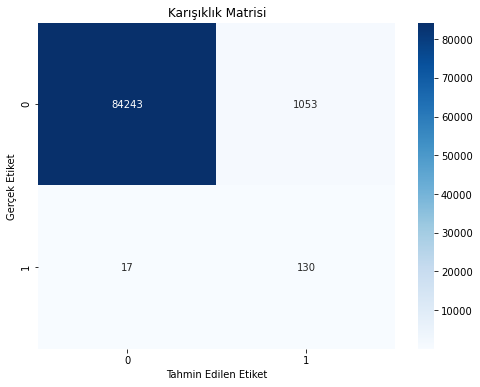

In [88]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()


## Over Sampling

To achieve more accurate results, Over Sampling is applied only to the training data

In [58]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [59]:
# Oversampled dataset
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,test_size = 0.3,random_state = 0)

In [60]:
from sklearn.metrics import make_scorer

model = CatBoostClassifier(**best_params)

model.fit(X_train_ros, y_train_ros)

0:	learn: 0.3154578	total: 59.4ms	remaining: 5.41s
1:	learn: 0.2159696	total: 104ms	remaining: 4.68s
2:	learn: 0.1632849	total: 149ms	remaining: 4.42s
3:	learn: 0.1322746	total: 189ms	remaining: 4.16s
4:	learn: 0.1111450	total: 234ms	remaining: 4.06s
5:	learn: 0.0941397	total: 282ms	remaining: 4.04s
6:	learn: 0.0836194	total: 326ms	remaining: 3.96s
7:	learn: 0.0725484	total: 367ms	remaining: 3.86s
8:	learn: 0.0663328	total: 411ms	remaining: 3.79s
9:	learn: 0.0613079	total: 456ms	remaining: 3.73s
10:	learn: 0.0517999	total: 503ms	remaining: 3.7s
11:	learn: 0.0483230	total: 545ms	remaining: 3.63s
12:	learn: 0.0443091	total: 592ms	remaining: 3.6s
13:	learn: 0.0393926	total: 639ms	remaining: 3.56s
14:	learn: 0.0372448	total: 689ms	remaining: 3.54s
15:	learn: 0.0321853	total: 734ms	remaining: 3.49s
16:	learn: 0.0278395	total: 775ms	remaining: 3.42s
17:	learn: 0.0255953	total: 819ms	remaining: 3.37s
18:	learn: 0.0241369	total: 866ms	remaining: 3.33s
19:	learn: 0.0221762	total: 911ms	remainin

In [61]:
y_pred = model.predict(X_test_ros)
acc = accuracy_score(y_test_ros,y_pred)
recall = recall_score(y_test_ros,y_pred)
print("Accuracy:",acc,"---" " Recall:",recall)

Accuracy: 0.9996985227615315 --- Recall: 1.0


### Classification Report for OverSampled Data

In [62]:
report = classification_report(y_pred, y_test_ros)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60015
           1       1.00      1.00      1.00     59397

    accuracy                           1.00    119412
   macro avg       1.00      1.00      1.00    119412
weighted avg       1.00      1.00      1.00    119412



### Confusion Matrix for OverSampled Data

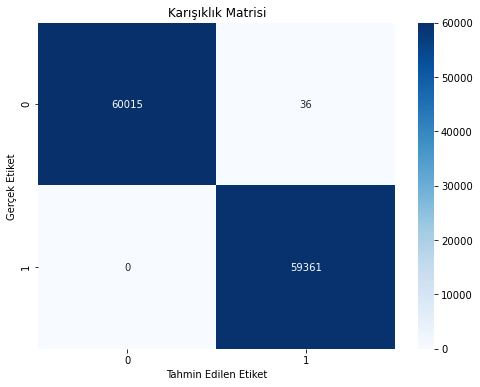

In [63]:
cm = confusion_matrix(y_test_ros,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()


In [64]:
y_pred1 = model.predict(X_test)
acc = accuracy_score(y_test,y_pred1)
recall = recall_score(y_test,y_pred1)
print("Accuracy:",acc,"---" " Recall:",recall)

Accuracy: 0.9992275552122467 --- Recall: 0.782312925170068


### Classification Report for All Data

In [65]:
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.78      0.78       147

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



### Confusion Matrix for All Data

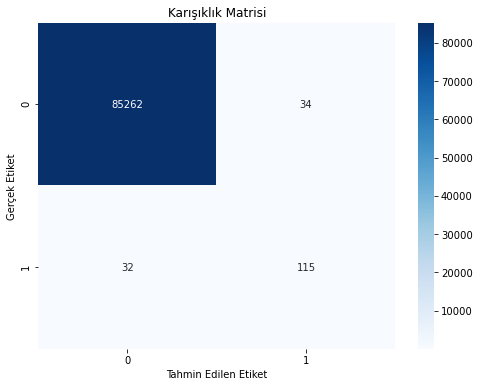

In [66]:
cm = confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi')
plt.show()
